Duvall Pinkney Insurance dataset of sex,age and whether or not a person is a smoker

# Homework 13

Load the required libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

pd.set_option('display.max_columns', None)

### Question 1

a) Load the insurance dataset from Labs 7, 9, and 12, and turn the `sex`, `age`, and `smoker` columns into dummy variables.

Insurance data URL:  [https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv]( https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv)

In [2]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
insurance_new = pd.get_dummies(insurance, columns = ["sex", "region", "smoker"], drop_first = True)
insurance_new.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


1b) As in Labs 7, 9, and 12, we will predict the price of the insurance policy.  Create the `x` and `y` variables containing the independent and dependent variables, respectively, and then split them into training (70%) and testing (30%) data.

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin_model = LinearRegression()


In [48]:
x = np.hstack([np.ones([len(insurance_new), 1]), insurance_new[["bmi"]].values])
x

array([[ 1.  , 27.9 ],
       [ 1.  , 33.77],
       [ 1.  , 33.  ],
       ...,
       [ 1.  , 36.85],
       [ 1.  , 25.8 ],
       [ 1.  , 29.07]])

In [49]:
y = np.hstack([np.ones([len(insurance_new), 1]), insurance_new[["charges"]].values])
y

array([[1.00000000e+00, 1.68849240e+04],
       [1.00000000e+00, 1.72555230e+03],
       [1.00000000e+00, 4.44946200e+03],
       ...,
       [1.00000000e+00, 1.62983350e+03],
       [1.00000000e+00, 2.00794500e+03],
       [1.00000000e+00, 2.91413603e+04]])

ValueError: shapes (100,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

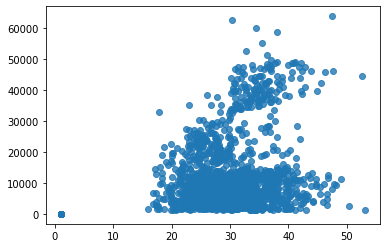

In [55]:
sns.regplot(x = x, y = y, data =insurance_new)

In [50]:
lin_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = lin_model.predict(x)
y_pred

array([[1.00000000e+00, 1.21819948e+04],
       [1.00000000e+00, 1.44940295e+04],
       [1.00000000e+00, 1.41907472e+04],
       ...,
       [1.00000000e+00, 1.57071584e+04],
       [1.00000000e+00, 1.13548614e+04],
       [1.00000000e+00, 1.26428262e+04]])

1c) Fit a k-nearest neighbor regression model, with k = 5 to the training data, and use it to predict the prices for both the test and training data.

In [53]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

1d)  What are the mean squared errors for the training and testing data?

In [58]:
mean_squared_error(x,y)

160902372.9146588

1e) How do the two mean squared errors compare?  How do they compare to the mean squared errors from linear regression and decisions trees that you computed in Lab 12?  Which model would you recommend to predict insurance prices?

### Question 2

2a) Scale the training and testing data to be between 0 and 1.

In [59]:
scaler = MinMaxScaler()

In [60]:
x_train_scaled = scaler.fit_transform(x_train)

NameError: name 'x_train' is not defined

2b) Fit a k-nearest neighbor regression model, with k = 5 to the scaled training data, and use it to predict the prices for both the scaled test and training data.

2c) What are the mean squared errors for the scaled training and testing dat

2d) How do the two mean squared errors using scaled data compare?  How do they compare to the unscaled mean squared errors from Question 1?  Do you recommend scaling the insurance data when using the k-nearest neighbors model?  Of the k-nearest neighbor model (with scaled data), and the decision tree and linear regression models from Lab 12, which would you recommend now?  Why?

In [61]:
mses = []
for k in range(1,21):
    print("Now computing MSE for k=",k)
    iknn_scaled = KNeighborsRegressor(n_neighbors = k)
    iknn_scaled.fit(x_train_scaled, y_train)
    iy_pred_scaled = iknn_scaled.predict(x_test_scaled)
    mse = mean_squared_error(iy_pred_scaled, y_test)
    mses.append(mse)

Now computing MSE for k= 1


NameError: name 'x_train_scaled' is not defined

### Question 3

For at least two new, different values of k (you may use a loop if you want, but do not have to):
    * fit your model to the scaled training data
    * use your model to predict insurance prices for the training and testing data
    * compute the mean squared errors for both predictions
    
Which parameter k do you recommend using for fitting a k-nearest neighbor model on this insurance data?  Why? 

Of the best k-nearest neighbor model (this question), the best decision tree model (Lab 12), or linear regression, which do you recommend we use to predict insurance prices?  Why?